In [1]:
# pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
datadf = pd.read_csv('dataset.csv')
datadf.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX
0,38045314,380475,531475,0,20200101,4213000000,2.88,0.72,0,0,0,0,0,0,0,0
1,38045324,380475,532475,0,20200101,4213000000,9.36,1.44,0,0,0,0,0,0,0,0
2,38145354,381475,535475,0,20200101,4213000000,3.93,0.15,0,0,0,0,0,0,0,0
3,38245184,382475,518475,0,20200101,4213000000,2.69,0.16,0,0,0,0,0,0,0,0
4,38245194,382475,519475,0,20200101,4213000000,2.35,0.14,0,0,0,0,0,0,0,0


# 1. 상관분석

In [6]:
corrdata = datadf.corr(method='pearson').round(2)
corrdata

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX
GRID_ID,1.00,1.00,0.14,0.03,-0.00,NaN,0.14,0.14,0.02,0.01,0.01,0.00,0.01,0.03,0.02,0.02
GRID_X_AXIS,1.00,1.00,0.14,0.03,-0.00,NaN,0.14,0.14,0.02,0.01,0.01,0.00,0.01,0.03,0.02,0.02
GRID_Y_AXIS,0.14,0.14,1.00,0.01,-0.01,NaN,0.05,0.05,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
TIME,0.03,0.03,0.01,1.00,0.00,NaN,0.09,0.08,-0.01,0.00,0.00,0.00,0.00,-0.00,-0.01,0.00
YMD,-0.00,-0.00,-0.01,0.00,1.00,NaN,0.00,0.02,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
STDG_CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FP_IDEX,0.14,0.14,0.05,0.09,0.00,NaN,1.00,0.93,0.11,0.07,0.05,-0.00,0.05,0.15,0.11,0.11
OLD_FP_IDEX,0.14,0.14,0.05,0.08,0.02,NaN,0.93,1.00,0.12,0.07,0.05,0.00,0.06,0.16,0.12,0.11
RELIFPLC_DWL_IDEX,0.02,0.02,0.00,-0.01,-0.00,NaN,0.11,0.12,1.00,0.02,0.01,0.00,0.02,0.72,0.72,0.38
RELIFPLC_ROAD_IDEX,0.01,0.01,0.00,0.00,0.00,NaN,0.07,0.07,0.02,1.00,0.01,0.00,0.01,0.49,0.09,0.58


Text(0.5, 1.0, 'correlation between features')

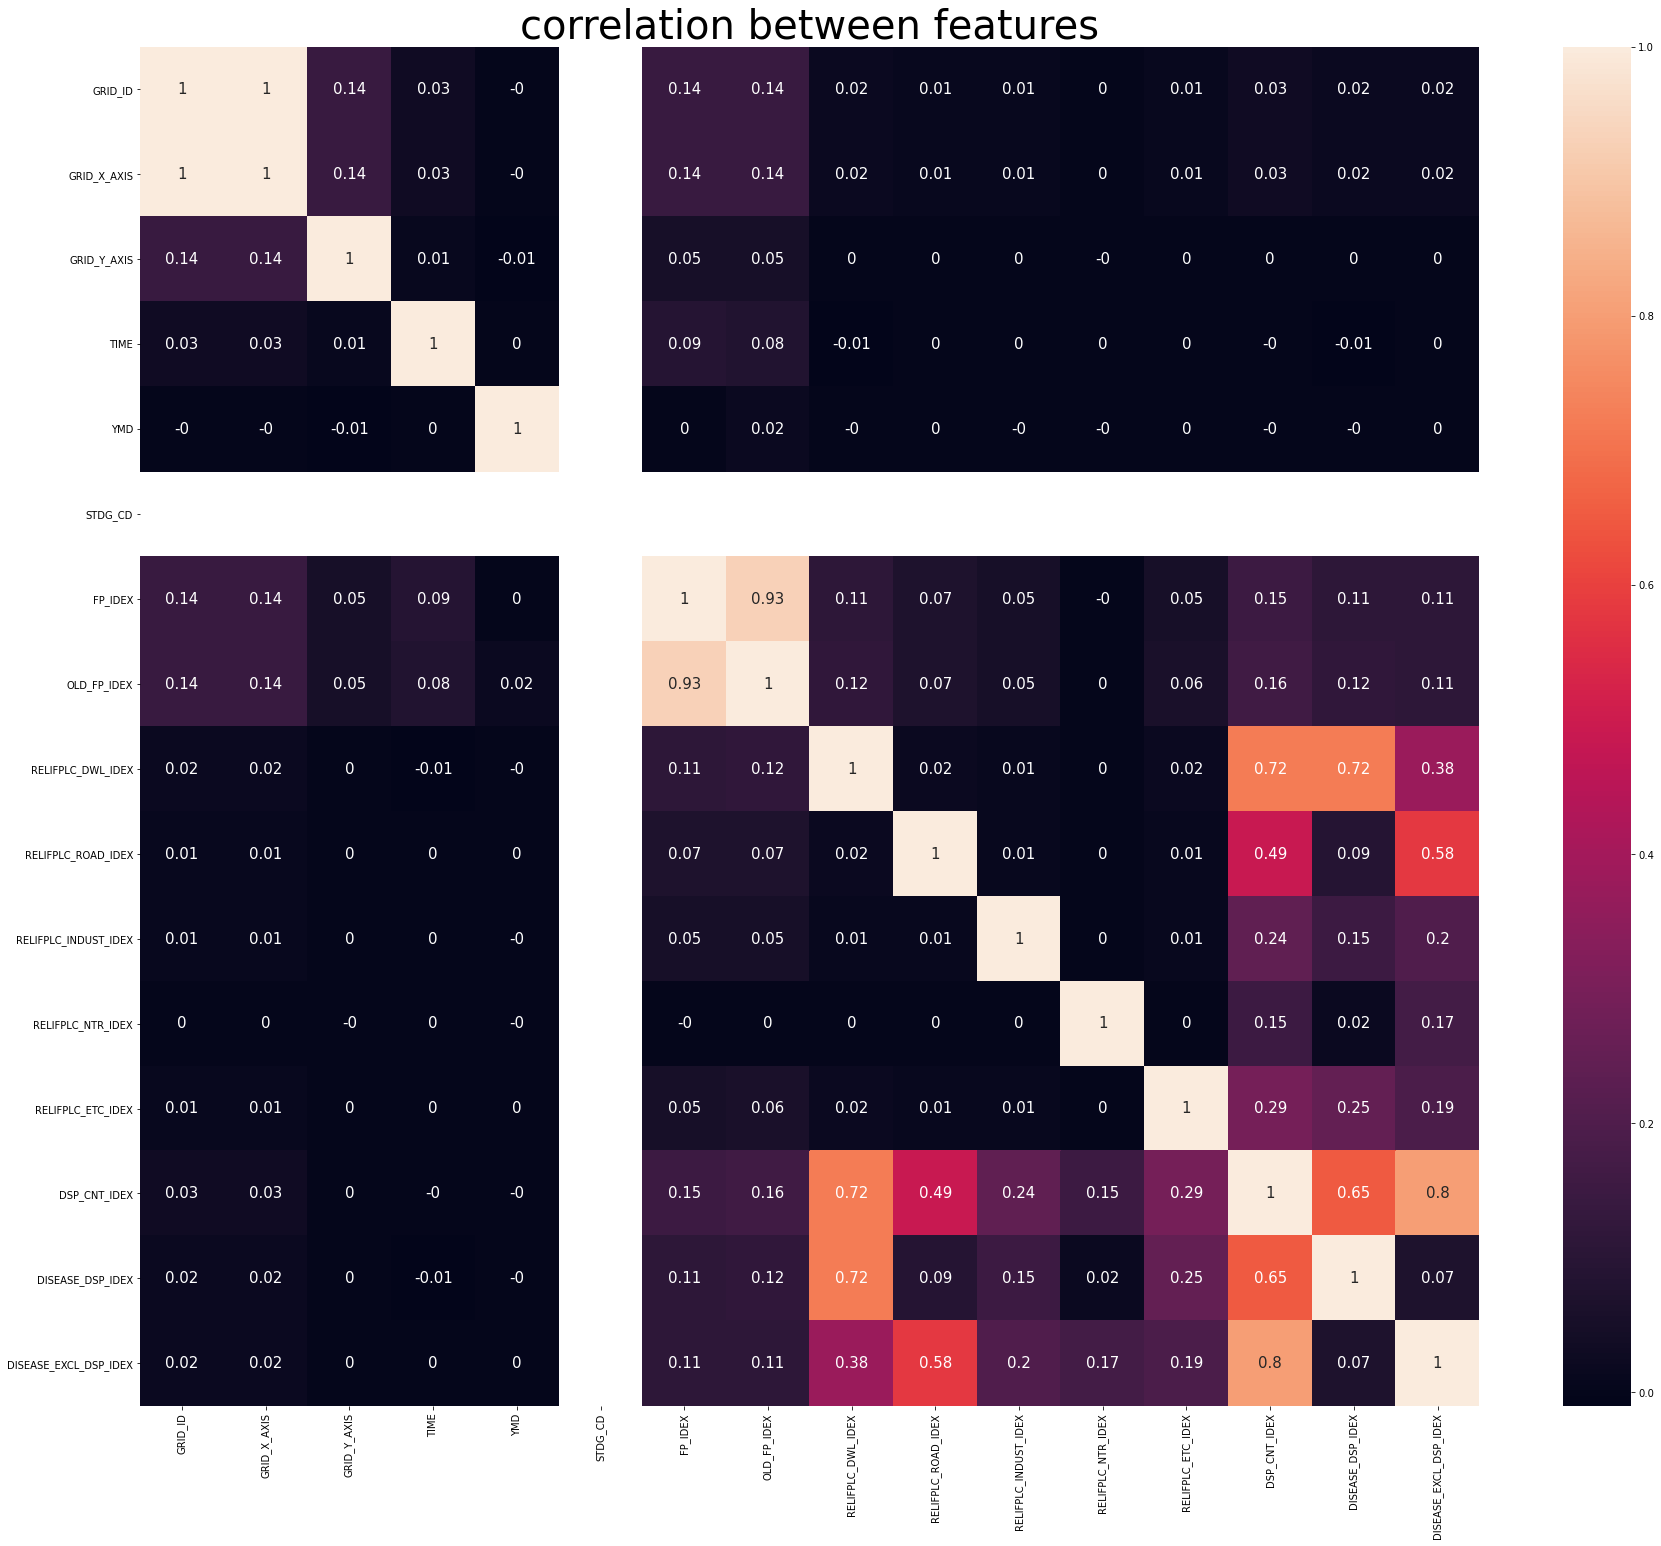

In [10]:
plt.figure(figsize=(30,25))
sns.heatmap(data=corrdata, annot=True, annot_kws={"size":15})
plt.title('correlation between features', fontsize=40)

# 2. 회귀분석

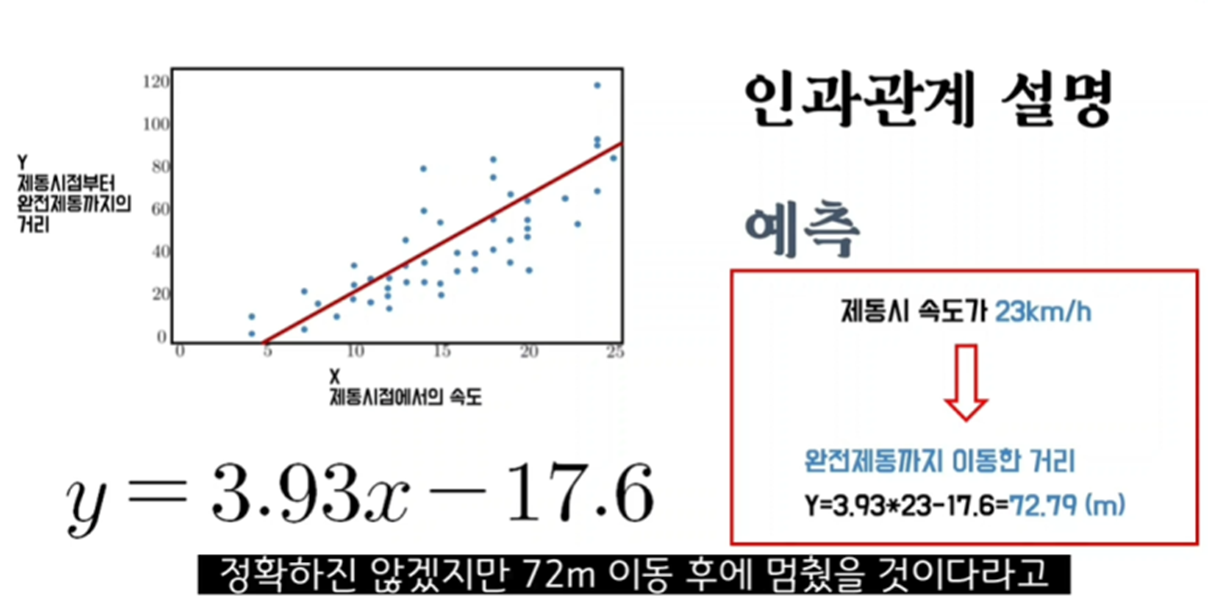

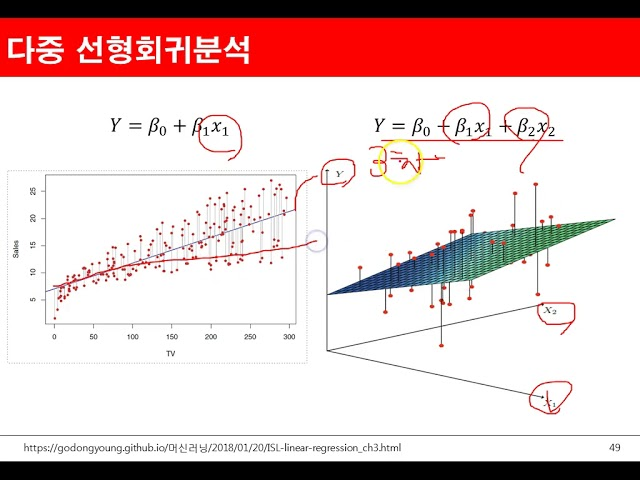

In [7]:
datadf.columns

Index(['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS', 'TIME', 'YMD', 'STDG_CD',
       'FP_IDEX', 'OLD_FP_IDEX', 'RELIFPLC_DWL_IDEX', 'RELIFPLC_ROAD_IDEX',
       'RELIFPLC_INDUST_IDEX', 'RELIFPLC_NTR_IDEX', 'RELIFPLC_ETC_IDEX',
       'DSP_CNT_IDEX', 'DISEASE_DSP_IDEX', 'DISEASE_EXCL_DSP_IDEX'],
      dtype='object')

In [8]:
result =smf.ols('DSP_CNT_IDEX ~ TIME + YMD + FP_IDEX + OLD_FP_IDEX + RELIFPLC_DWL_IDEX + RELIFPLC_ROAD_IDEX + RELIFPLC_INDUST_IDEX + RELIFPLC_NTR_IDEX + RELIFPLC_ETC_IDEX + DISEASE_DSP_IDEX ',data=datadf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DSP_CNT_IDEX   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 1.578e+06
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:01:14   Log-Likelihood:             3.4684e+06
No. Observations:             1769078   AIC:                        -6.937e+06
Df Residuals:                 1769067   BIC:                        -6.937e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.9126      1.520      1.259      0.208      -1.066       4.891
TIME                 -1.163e-05   4.11e-06     -2.830      0.005   -1.97e-05   -3.58e-06
YMD                  -9.466e-08   7.52e-08     -1.258      0.208   -2.42e-07    5.28e-08
FP_IDEX              -4.967e-07   6.91e-08     -7.189      0.000   -6.32e-07   -3.61e-07
OLD_FP_IDEX           1.793e-05   6.39e-07     28.072      0.000    1.67e-05    1.92e-05
RELIFPLC_DWL_IDEX        1.0233      0.001   1944.579      0.000       1.022       1.024
RELIFPLC_ROAD_IDEX       1.0430      0.001   1979.108      0.000       1.042       1.044
RELIFPLC_INDUST_IDEX     1.0281      0.001    934.118      0.000       1.026       1.030
RELIFPLC_NTR_IDEX        1.0516      0.002    594.228      0.000       1.048       1.055
RELIFPLC_ETC_IDEX        1.0418      0.001   1056.000      0.000       1.040       1.044
DISEASE_DSP_IDEX         0.0046      0.001      7.446      0.000       0.003       0.006
==============================================================================
Omnibus:                  4798713.063   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     155413379076.015
Skew:                          33.864   Prob(JB):                         0.00
Kurtosis:                    1453.452   Cond. No.                     1.20e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
result2 =smf.ols('DSP_CNT_IDEX ~ FP_IDEX + OLD_FP_IDEX + RELIFPLC_DWL_IDEX + RELIFPLC_ROAD_IDEX + RELIFPLC_INDUST_IDEX + RELIFPLC_NTR_IDEX + RELIFPLC_ETC_IDEX + DISEASE_DSP_IDEX ',data=datadf).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DSP_CNT_IDEX   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 1.972e+06
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:01:16   Log-Likelihood:             3.4684e+06
No. Observations:             1769078   AIC:                        -6.937e+06
Df Residuals:                 1769069   BIC:                        -6.937e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0003   2.78e-05     11.679      0.000       0.000       0.000
FP_IDEX              -5.006e-07   6.89e-08     -7.262      0.000   -6.36e-07   -3.66e-07
OLD_FP_IDEX            1.79e-05   6.38e-07     28.070      0.000    1.66e-05    1.91e-05
RELIFPLC_DWL_IDEX        1.0233      0.001   1944.650      0.000       1.022       1.024
RELIFPLC_ROAD_IDEX       1.0430      0.001   1979.113      0.000       1.042       1.044
RELIFPLC_INDUST_IDEX     1.0281      0.001    934.133      0.000       1.026       1.030
RELIFPLC_NTR_IDEX        1.0516      0.002    594.225      0.000       1.048       1.055
RELIFPLC_ETC_IDEX        1.0418      0.001   1056.001      0.000       1.040       1.044
DISEASE_DSP_IDEX         0.0046      0.001      7.462      0.000       0.003       0.006
==============================================================================
Omnibus:                  4798726.084   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     155416139102.933
Skew:                          33.864   Prob(JB):                         0.00
Kurtosis:                    1453.465   Cond. No.                     7.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
result3 =smf.ols('DSP_CNT_IDEX ~ FP_IDEX + OLD_FP_IDEX + RELIFPLC_DWL_IDEX + RELIFPLC_ROAD_IDEX + RELIFPLC_INDUST_IDEX + RELIFPLC_NTR_IDEX + RELIFPLC_ETC_IDEX',data=datadf).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DSP_CNT_IDEX   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 2.254e+06
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:01:17   Log-Likelihood:             3.4684e+06
No. Observations:             1769078   AIC:                        -6.937e+06
Df Residuals:                 1769070   BIC:                        -6.937e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0003   2.78e-05     11.686      0.000       0.000       0.000
FP_IDEX               -5.04e-07   6.89e-08     -7.311      0.000   -6.39e-07   -3.69e-07
OLD_FP_IDEX           1.795e-05   6.38e-07     28.152      0.000    1.67e-05    1.92e-05
RELIFPLC_DWL_IDEX        1.0262      0.000   2922.464      0.000       1.026       1.027
RELIFPLC_ROAD_IDEX       1.0434      0.001   1992.990      0.000       1.042       1.044
RELIFPLC_INDUST_IDEX     1.0298      0.001    957.520      0.000       1.028       1.032
RELIFPLC_NTR_IDEX        1.0520      0.002    594.771      0.000       1.049       1.055
RELIFPLC_ETC_IDEX        1.0442      0.001   1123.527      0.000       1.042       1.046
==============================================================================
Omnibus:                  4798629.550   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     155328820944.827
Skew:                          33.863   Prob(JB):                         0.00
Kurtosis:                    1453.057   Cond. No.                     7.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
result4 =smf.ols('DSP_CNT_IDEX ~ RELIFPLC_DWL_IDEX + RELIFPLC_ROAD_IDEX + RELIFPLC_INDUST_IDEX + RELIFPLC_NTR_IDEX + RELIFPLC_ETC_IDEX',data=datadf).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DSP_CNT_IDEX   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 3.149e+06
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:01:21   Log-Likelihood:             3.4668e+06
No. Observations:             1769078   AIC:                        -6.934e+06
Df Residuals:                 1769072   BIC:                        -6.934e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0008   2.57e-05     31.391      0.000       0.001       0.001
RELIFPLC_DWL_IDEX        1.0285      0.000   2945.199      0.000       1.028       1.029
RELIFPLC_ROAD_IDEX       1.0455      0.001   2000.391      0.000       1.045       1.047
RELIFPLC_INDUST_IDEX     1.0325      0.001    960.066      0.000       1.030       1.035
RELIFPLC_NTR_IDEX        1.0520      0.002    594.234      0.000       1.049       1.055
RELIFPLC_ETC_IDEX        1.0474      0.001   1127.939      0.000       1.046       1.049
==============================================================================
Omnibus:                  4802486.164   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     155770195074.236
Skew:                          33.936   Prob(JB):                         0.00
Kurtosis:                    1455.113   Cond. No.                         69.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result5 =smf.ols('DSP_CNT_IDEX ~ RELIFPLC_DWL_IDEX + RELIFPLC_ROAD_IDEX + RELIFPLC_INDUST_IDEX + RELIFPLC_NTR_IDEX',data=datadf).fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DSP_CNT_IDEX   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 2.105e+06
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:01:23   Log-Likelihood:             2.9875e+06
No. Observations:             1769078   AIC:                        -5.975e+06
Df Residuals:                 1769073   BIC:                        -5.975e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0015   3.37e-05     44.170      0.000       0.001       0.002
RELIFPLC_DWL_IDEX        1.0373      0.000   2266.249      0.000       1.036       1.038
RELIFPLC_ROAD_IDEX       1.0491      0.001   1530.880      0.000       1.048       1.050
RELIFPLC_INDUST_IDEX     1.0481      0.001    743.399      0.000       1.045       1.051
RELIFPLC_NTR_IDEX        1.0596      0.002    456.494      0.000       1.055       1.064
==============================================================================
Omnibus:                  4417896.125   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      65351984467.428
Skew:                          27.567   Prob(JB):                         0.00
Kurtosis:                     942.974   Cond. No.                         69.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
result6 =smf.ols('DSP_CNT_IDEX ~ RELIFPLC_DWL_IDEX + RELIFPLC_ROAD_IDEX + RELIFPLC_INDUST_IDEX',data=datadf).fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DSP_CNT_IDEX   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 2.448e+06
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:01:27   Log-Likelihood:             2.8890e+06
No. Observations:             1769078   AIC:                        -5.778e+06
Df Residuals:                 1769074   BIC:                        -5.778e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0017   3.56e-05     47.450      0.000       0.002       0.002
RELIFPLC_DWL_IDEX        1.0377      0.000   2144.260      0.000       1.037       1.039
RELIFPLC_ROAD_IDEX       1.0494      0.001   1448.421      0.000       1.048       1.051
RELIFPLC_INDUST_IDEX     1.0500      0.001    704.414      0.000       1.047       1.053
==============================================================================
Omnibus:                  4344453.422   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      55385016853.250
Skew:                          26.471   Prob(JB):                         0.00
Kurtosis:                     868.201   Cond. No.                         41.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. 로지스틱 회귀분석

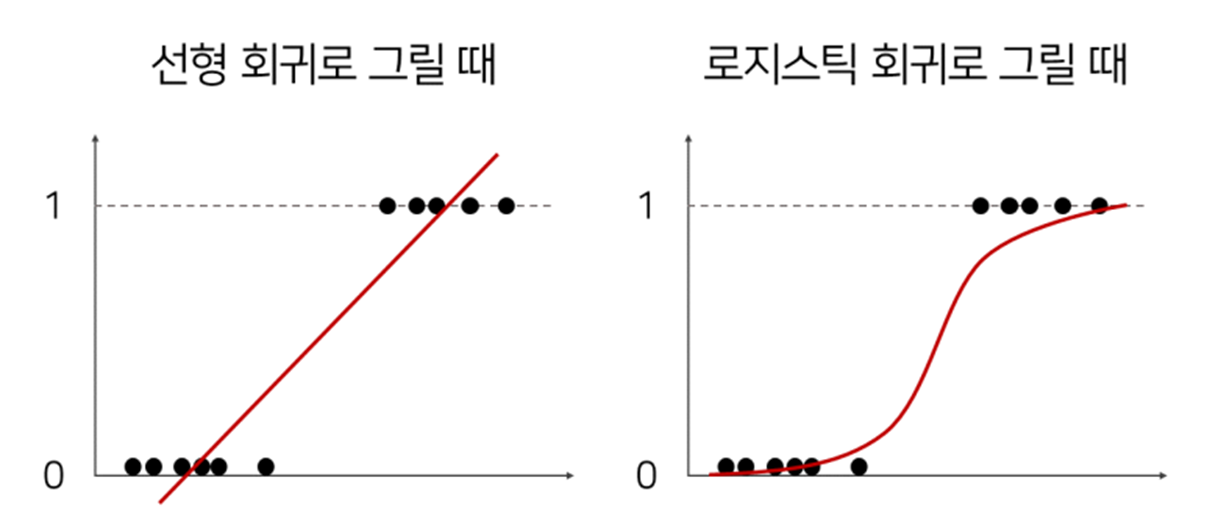

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [15]:
datadf['DT'] = (datadf.DSP_CNT_IDEX > 0).astype(int)  # Boolean 타입 변수를 INT 타입으로 변경햐서 저장

In [16]:
datadf.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,DT
0,38045314,380475,531475,0,20200101,4213000000,2.88,0.72,0,0,0,0,0,0,0,0,0
1,38045324,380475,532475,0,20200101,4213000000,9.36,1.44,0,0,0,0,0,0,0,0,0
2,38145354,381475,535475,0,20200101,4213000000,3.93,0.15,0,0,0,0,0,0,0,0,0
3,38245184,382475,518475,0,20200101,4213000000,2.69,0.16,0,0,0,0,0,0,0,0,0
4,38245194,382475,519475,0,20200101,4213000000,2.35,0.14,0,0,0,0,0,0,0,0,0


In [17]:
datadf[datadf.DT > 0]

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,DT
28,38545254,385475,525475,0,20200101,4213000000,7.57,0.49,1,0,0,0,0,1,1,0,1
73,39345264,393475,526475,0,20200101,4213000000,1991.34,79.17,1,0,0,0,0,2,1,1,1
84,39445284,394475,528475,0,20200101,4213000000,1515.30,80.44,1,0,0,0,0,1,1,0,1
106,39645274,396475,527475,0,20200101,4213000000,389.21,63.22,0,0,1,0,0,1,0,1,1
216,39445284,394475,528475,1,20200101,4213000000,1539.88,79.37,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768431,39945214,399475,521475,20,20201230,4213000000,11.99,1.68,0,0,1,0,0,1,1,0,1
1768574,39445264,394475,526475,21,20201230,4213000000,4563.22,379.53,0,1,0,0,0,1,0,1,1
1768632,39845244,398475,524475,21,20201230,4213000000,1245.73,56.89,1,0,0,0,0,1,0,1,1
1768881,39445374,394475,537475,22,20201230,4213000000,0.00,0.00,0,0,0,0,0,2,0,2,1


In [18]:
datadf.columns

Index(['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS', 'TIME', 'YMD', 'STDG_CD',
       'FP_IDEX', 'OLD_FP_IDEX', 'RELIFPLC_DWL_IDEX', 'RELIFPLC_ROAD_IDEX',
       'RELIFPLC_INDUST_IDEX', 'RELIFPLC_NTR_IDEX', 'RELIFPLC_ETC_IDEX',
       'DSP_CNT_IDEX', 'DISEASE_DSP_IDEX', 'DISEASE_EXCL_DSP_IDEX', 'DT'],
      dtype='object')

In [19]:
X = datadf[['FP_IDEX', 'OLD_FP_IDEX', 'RELIFPLC_DWL_IDEX', 'RELIFPLC_ROAD_IDEX','RELIFPLC_INDUST_IDEX', 'RELIFPLC_NTR_IDEX', 'RELIFPLC_ETC_IDEX']]
y = datadf['DT']

scaler = MinMaxScaler()        
X = scaler.fit_transform(X)
X

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 123)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1415262, 7)
Shape of y_train:  (1415262,)
Shape of X_test:  (353816, 7)
Shape of y_test:  (353816,)


In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]

y_pred_proba 

array([0.48145069, 0.00181977, 0.00153238, ..., 0.00151644, 0.00151553,
       0.00152909])

In [21]:
print("# of test samples: ",y_test.shape[0])
print("Confusion matrix: \n",confusion_matrix(y_test, y_pred))
print("Performance evaluation metrics: \n", classification_report(y_test, y_pred))

# of test samples:  353816
Confusion matrix: 
 [[350794      0]
 [   368   2654]]
Performance evaluation metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    350794
           1       1.00      0.88      0.94      3022

    accuracy                           1.00    353816
   macro avg       1.00      0.94      0.97    353816
weighted avg       1.00      1.00      1.00    353816



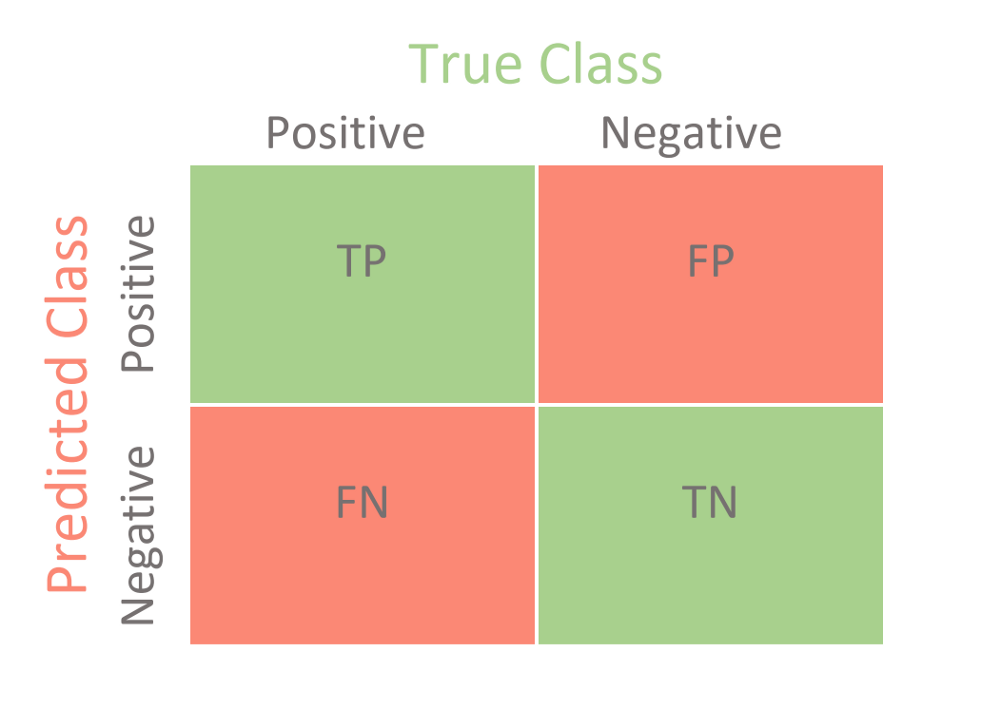

https://blog.naver.com/hannaurora/222498671200

0.974248467408909

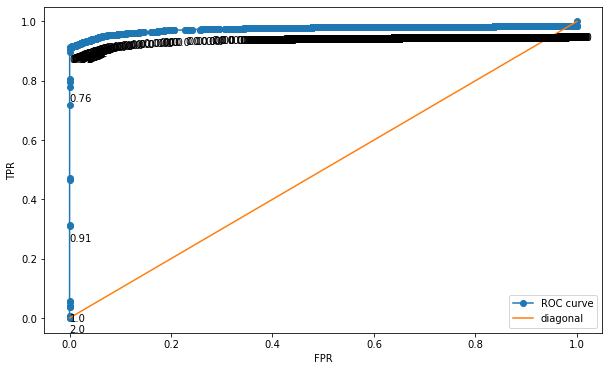

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:])

plt.subplots(figsize = (10,6))
plt.plot(fpr, tpr, 'o-',label = "ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label = 'diagonal')
for x,y,z in zip(fpr[::5], tpr[::5], thresholds[::5]) :
    plt.annotate(np.round(z,2), (x,y-0.05))
plt.legend(loc = 'lower right')
plt.xlabel("FPR")
plt.ylabel("TPR")      

roc_auc_score(y_test, y_pred_proba)

In [23]:
datadf.columns

Index(['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS', 'TIME', 'YMD', 'STDG_CD',
       'FP_IDEX', 'OLD_FP_IDEX', 'RELIFPLC_DWL_IDEX', 'RELIFPLC_ROAD_IDEX',
       'RELIFPLC_INDUST_IDEX', 'RELIFPLC_NTR_IDEX', 'RELIFPLC_ETC_IDEX',
       'DSP_CNT_IDEX', 'DISEASE_DSP_IDEX', 'DISEASE_EXCL_DSP_IDEX', 'DT'],
      dtype='object')

In [24]:
X = datadf[['GRID_ID', 'TIME', 'YMD','FP_IDEX', 'OLD_FP_IDEX']]
y = datadf['DT']

scaler = MinMaxScaler()        
X = scaler.fit_transform(X)
X

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 123)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1415262, 5)
Shape of y_train:  (1415262,)
Shape of X_test:  (353816, 5)
Shape of y_test:  (353816,)


In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]

y_pred_proba 

array([0.00472565, 0.00470956, 0.00545089, ..., 0.00400055, 0.00544321,
       0.00769032])

In [26]:
print("# of test samples: ",y_test.shape[0])
print("Confusion matrix: \n",confusion_matrix(y_test, y_pred))
print("Performance evaluation metrics: \n", classification_report(y_test, y_pred))

# of test samples:  353816
Confusion matrix: 
 [[350728     66]
 [  3010     12]]
Performance evaluation metrics: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    350794
           1       0.15      0.00      0.01      3022

    accuracy                           0.99    353816
   macro avg       0.57      0.50      0.50    353816
weighted avg       0.98      0.99      0.99    353816



0.797756276206338

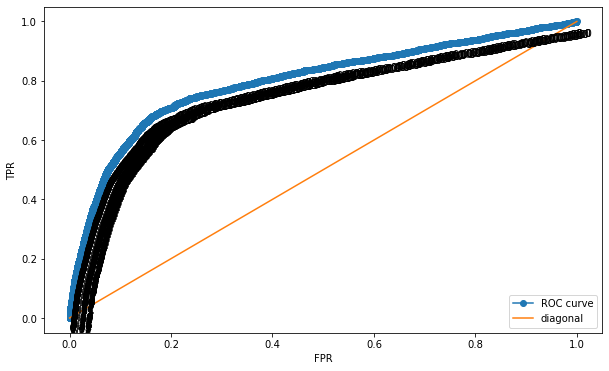

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:])

plt.subplots(figsize = (10,6))
plt.plot(fpr, tpr, 'o-',label = "ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label = 'diagonal')
for x,y,z in zip(fpr[::5], tpr[::5], thresholds[::5]) :
    plt.annotate(np.round(z,2), (x,y-0.05))
plt.legend(loc = 'lower right')
plt.xlabel("FPR")
plt.ylabel("TPR")      

roc_auc_score(y_test, y_pred_proba)